In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224,224]

train_path = "dataset/"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2,validation_split=0.15)

training_set = train_datagen.flow_from_directory(
        train_path,target_size=(224,224), batch_size=32,class_mode='categorical',
        subset='training')

validation_set = train_datagen.flow_from_directory(
        train_path,target_size=(224,224), batch_size=32,class_mode='categorical',shuffle = True,
        subset='validation')

Using TensorFlow backend.


Found 102 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout

## We are initialising the input shape with 3 channels rgb and weights as imagenet and include_top as False will make to use our own custom inputs

mv = VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [5]:
for layers in mv.layers:
    layers.trainable = False

In [6]:
x = Flatten()(mv.output)
prediction = Dense(3,activation='softmax')(x)

In [7]:
model = Model(inputs=mv.input,outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<=0.05):
            print("\nEnding training")
            self.model.stop_training = True
# initiating the myCallback function
callbacks = myCallback()

In [9]:
## Let us compile the model with Adam optimizer and loss function categorical_crossentropy and metrics as categorical_accuracy
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])


In [10]:
history = model.fit(training_set,
                              validation_data=validation_set,
                              epochs=50,
                              verbose=1,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(validation_set),
                              callbacks = [callbacks]
                             )

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 1.1757 - categorical_accuracy: 0.2941 - val_loss: 1.0793 - val_categorical_accuracy: 0.4000
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 1.0837 - categorical_accuracy: 0.4216 - val_loss: 1.0304 - val_categorical_accuracy: 0.5333
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 0.9976 - categorical_accuracy: 0.5784 - val_loss: 1.0031 - val_categorical_accuracy: 0.4667
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 1.0088 - categorical_accuracy: 0.4608 - val_loss: 1.0590 - val_categorical_accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.9343 - categorical_accuracy: 0.5784 - val_loss: 0.8862 - val_categorical_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.9289 - categorical_accuracy: 0.5686 - val_loss: 0.8519 - val_categorical_accuracy: 0.6000
Epoch 7/50
4/4 [==================

<Figure size 432x288 with 0 Axes>

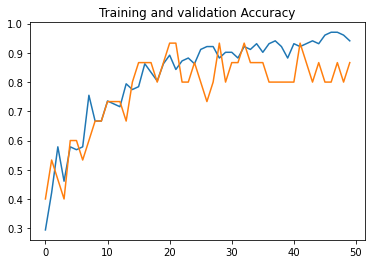

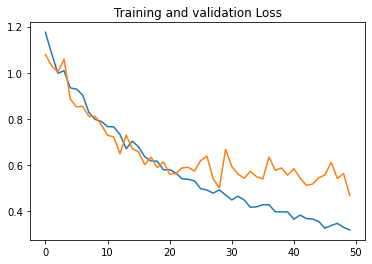

<Figure size 432x288 with 0 Axes>

In [11]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("Training and validation Accuracy")
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("Training and validation Loss")
plt.figure()

In [13]:
model.save("VGG-19.h5")

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 224,224

# load the model we saved
model = load_model('VGG-19.h5')
# predicting images
img = image.load_img('test/DSC_0118.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
print (classes)

[[0.0000000e+00 1.0000000e+00 1.8829944e-20]]
